Import python modules. These are libraries that will allow us to read in images and perform math operations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Open and display an image in grayscale and color

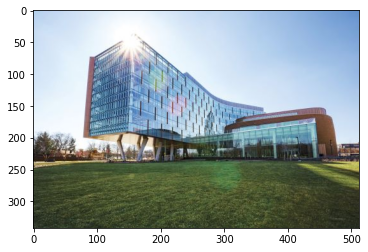

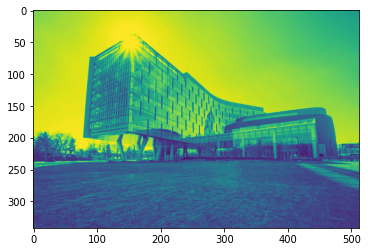

In [40]:
myimage_name = 'Iribe.jpg'#Change to your images name
I = cv.imread(myimage_name,0)#Treats as grayscale
I_color=cv.cvtColor(cv.imread(myimage_name),cv.COLOR_BGR2RGB)
plt.imshow(I_color)
plt.show()

plt.imshow(I)
plt.show()

Find and plot the image edges with canny edge detection algorithm

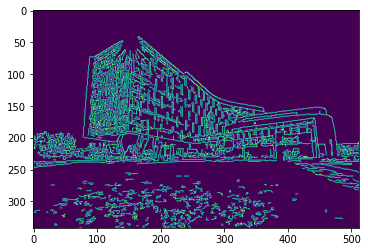

In [41]:
edges = cv.Canny(I,100,200)
plt.imshow(edges)
plt.show()

Extract the foreground with the grab cut algorithm

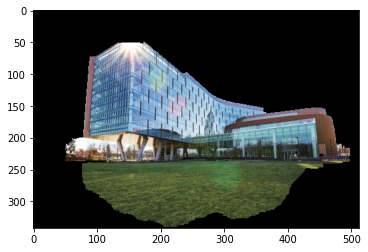

In [43]:
mask = np.zeros(I_color.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)#Adjusts area of interest
cv.grabCut(I_color,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
I_color_masked = I_color*mask2[:,:,np.newaxis]
plt.imshow(I_color_masked)
plt.show()

Load a second image and resize it to match the size of the first image

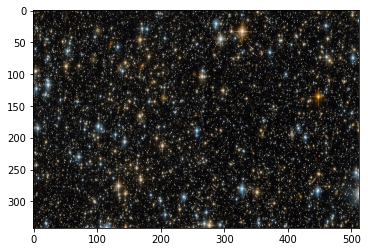

In [45]:
myImageName2='HubbleImage.jpg'
I2_color=cv.cvtColor(cv.imread(myImageName2),cv.COLOR_BGR2RGB)
dim=(512,342)#This should be the size of the image you uploaded
I2_resized = cv.resize(I2_color,dsize=dim, interpolation = cv.INTER_CUBIC)
plt.imshow(I2_resized)
plt.show()

Apply the opposite mask to the 2nd image

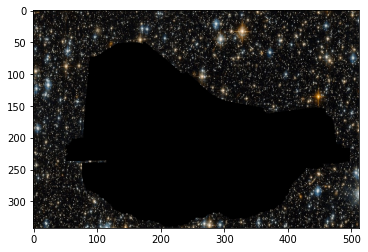

In [46]:
I2_color_masked=I2_resized*(1-mask2[:,:,np.newaxis])
plt.imshow(I2_color_masked)
plt.show()

Combine the two images

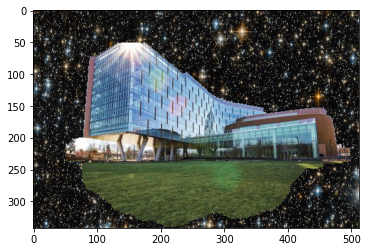

In [47]:
I3_color=I_color_masked+I2_color_masked
plt.imshow(I3_color)
plt.show()